<a href="https://colab.research.google.com/github/VladimirDudokin/ii/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled0_ipynb%22%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
dfAUS = pd.read_csv ("/content/en_AUS_AllYears_WITS_Trade_Summary.CSV")
dfBEL = pd.read_csv ("/content/en_BEL_AllYears_WITS_Trade_Summary.CSV")
dfBOL = pd.read_csv ("/content/en_BOL_AllYears_WITS_Trade_Summary.CSV")
dfBRA = pd.read_csv ("/content/en_BRA_AllYears_WITS_Trade_Summary.CSV")
dfCHN = pd.read_csv ("/content/en_CHN_AllYears_WITS_Trade_Summary.CSV")
dfITA = pd.read_csv ("/content/en_ITA_AllYears_WITS_Trade_Summary.CSV")
dfKOR = pd.read_csv ("/content/en_KOR_AllYears_WITS_Trade_Summary.CSV")
dfRUS = pd.read_csv ("/content/en_RUS_AllYears_WITS_Trade_Summary.CSV")
dfTUR = pd.read_csv ("/content/en_TUR_AllYears_WITS_Trade_Summary.CSV")
dfUSA = pd.read_csv ("/content/en_USA_AllYears_WITS_Trade_Summary.CSV")

In [ ]:
df = pd.concat([dfAUS, dfBEL, dfBOL, dfBRA, dfCHN, dfITA, dfKOR, dfRUS, dfTUR, dfUSA], axis = 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1112 entries, 0 to 99
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Reporter            1112 non-null   object 
 1   Partner             1112 non-null   object 
 2   Product categories  1112 non-null   object 
 3   Indicator Type      1112 non-null   object 
 4   Indicator           1112 non-null   object 
 5   2019                928 non-null    float64
 6   2018                938 non-null    float64
 7   2017                938 non-null    float64
 8   2016                938 non-null    float64
 9   2015                938 non-null    float64
 10  2014                928 non-null    float64
 11  2013                928 non-null    float64
 12  2012                918 non-null    float64
 13  2011                938 non-null    float64
 14  2010                938 non-null    float64
 15  2009                936 non-null    float64
 16  2008         

In [ ]:
test = dfRUS[(dfRUS["Indicator Type"] == "Export") | (dfRUS["Indicator Type"] == "Import")]
test['total'] = test.loc[:, '2019':'1988'].sum(axis=1)

<ipython-input-67-089d1c194ee7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['total'] = test.loc[:, '2019':'1988'].sum(axis=1)


In [ ]:
test.pivot_table(values=['total'], index=['Indicator Type']).sort_values(by=['total'], ascending=False)

,total
Indicator Type,
Export,368278.208095
Import,308129.671290


In [ ]:
test2 = df[(df["Indicator Type"] == "Export") | (df["Indicator Type"] == "Import")]
test2['total'] = test2.loc[:, '2019':'1988'].sum(axis=1)
test2.pivot_table(values=['total'], index=['Reporter', 'Indicator Type'])

<ipython-input-69-566141e46ea8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['total'] = test2.loc[:, '2019':'1988'].sum(axis=1)


total
Reporter           Indicator Type              
Australia          Export          2.193058e+05
                   Import          3.271483e+05
Belgium            Export          5.070557e+05
                   Import          8.302815e+05
Bolivia            Export          7.515801e+03
                   Import          1.700852e+04
Brazil             Export          2.168815e+05
                   Import          2.326620e+05
China              Export          1.924465e+06
                   Import          2.302030e+06
Italy              Export          6.277034e+05
                   Import          7.056082e+05
Korea, Rep.        Export          4.945812e+05
                   Import          6.619913e+05
Russian Federation Export          3.682782e+05
                   Import          3.081297e+05
Turkey             Export          1.305493e+05
                   Import          2.459375e+05
United States      Export          1.782681e+06
                   Import          5.054629e+06

<ipython-input-70-c51549313ff0>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y="Reporter", x="total", hue="Indicator Type", ci=None, data=test2)


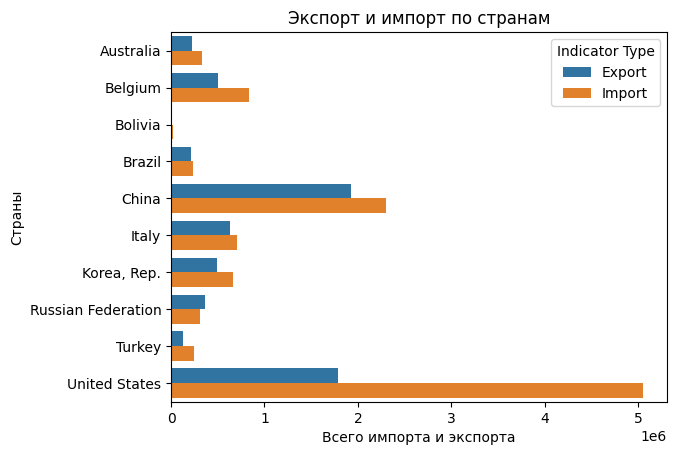

In [ ]:
sns.barplot(y="Reporter", x="total", hue="Indicator Type", ci=None, data=test2)
ax = plt.gca()
ax.set_xlabel('Всего импорта и экспорта')
ax.set_ylabel('Страны')
plt.title('Экспорт и импорт по странам')
plt.show()

In [ ]:
test3 = df[['Reporter', 'Partner']][df.Partner != 'World']

num_rows = test3.count()

print(f"Количество строк без партнера 'World': {num_rows}")

Количество строк без партнера 'World': Reporter    502
Partner     502
dtype: int64
